In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import airsim
import os

In [113]:
DESTINATION_FOLDER = "detected_lanes_5"

if not os.path.exists(DESTINATION_FOLDER):
    os.mkdir(DESTINATION_FOLDER)

plt.rcParams["figure.figsize"] = (21,18)

files_count = len(os.listdir("./images3"))
files_count

59

In [114]:
    def _get_image(self):
        """
        Returns the cropped front camera image
        """
        image_response = self.client.simGetImages([airsim.ImageRequest(0, airsim.ImageType.Scene, False, False)])[0]
        image1d = np.frombuffer(image_response.image_data_uint8, dtype=np.uint8)
        image_rgba = image1d.reshape(image_response.height, image_response.width, self.n_channels_env) # some envs. use diffrent number of channels (like l. mountains and nh)

        return image_rgba[self.crop_h1:self.crop_h2, self.crop_w1:self.crop_w2, 0:3]

In [115]:
for i in range (1, files_count):
    img = cv2.imread(f"./images2/road ({i}).png")
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    frame = cv2.GaussianBlur(img, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    low_yellow = np.array([18, 25, 140])
    up_yellow = np.array([48, 255, 255])
    mask = cv2.inRange(hsv, low_yellow, up_yellow)
    
    cv2.imwrite(f"./{DESTINATION_FOLDER}/img{i}.png", mask)  

In [98]:
frame = cv2.GaussianBlur(img, (5, 5), 0)
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
low_yellow = np.array([18, 25, 140])
up_yellow = np.array([48, 255, 255])
mask = cv2.inRange(hsv, low_yellow, up_yellow)

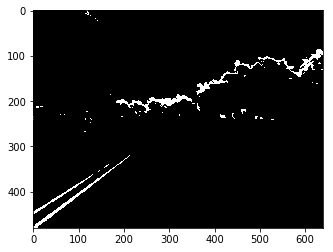

In [99]:
plt.imshow(cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB))

In [94]:
np.where(hsv != 0)

(array([  0,   0,   0, ..., 479, 479, 479], dtype=int64),
 array([ 32,  32,  32, ..., 639, 639, 639], dtype=int64),
 array([0, 1, 2, ..., 0, 1, 2], dtype=int64))

In [95]:
hsv.shape

(480, 640, 3)

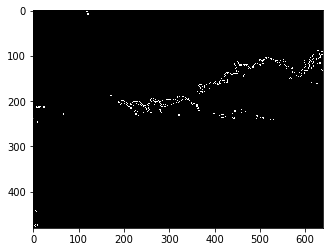

In [97]:
edges = cv2.Canny(mask, 150, 250)
plt.imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB))

In [61]:
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, maxLineGap=20)

In [41]:
len(lines)

6

In [52]:
l = cv2.cvtColor(np.array([60, 56, 0]), cv2.COLOR_RGB2HSV)

error: OpenCV(3.4.1) D:\Build\OpenCV\opencv-3.4.1\modules\imgproc\src\color.cpp:11109: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cv::cvtColor
